# CC7182 Programming for Analytics
# Spring Semester 2018-2019


Dataset Description:

The data used for the coursework is marketing campaign dataset based on a case of a retailer company. The primary objective of course work is to prepare data for further data mining and analysis. 


The details of the marketing campaign dataset is given below:
    Marketing campaign data.csv 

The data set contains 1500 customer records. Each record consists of 19 variables, which includes socio-demographic and product ownership information.  Variable 11, AFFINITY_CARD (1 = High-value, 0 = Low-value), is the target variable. 

All datasets are in CSV format with following attributes:
1.	CUST_ID
2.	CUST_GENDER
3.	AGE
4.	CUST_MARITAL_STATUS
5.	COUNTRY_NAME
6.	CUST_INCOME_LEVEL
7.	EDUCATION
8.	OCCUPATION
9.	HOUSEHOLD_SIZE
10.	YRS_RESIDENCE,
11.	AFFINITY_CARD
12.	BULK_PACK_DISKETTES
13.	FLAT_PANEL_MONITOR
14.	HOME_THEATER_PACKAGE
15.	BOOKKEEPING_APPLICATION
16.	PRINTER_SUPPLIES
17.	Y_BOX_GAMES
18.	OS_DOC_SET_KANJI
19.	COMMENTS


# Data Understanding

To address and see how the data attributes are for the dataset we have to import the data into python.
First step will be to import the libraries that will help will importing the files to allow to understand the dataset in more details. For this libraries like pandas or csv will be imported and the csv file will be called upon when importing the dataset.

In [1]:
#Import csv and pandas libraries and libraries for data visualizations
import pandas as pd
import numpy as np
import os
import  matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
filepath = os.path.join("..","Course Work")

In [3]:
#read the marketing campaing csv file in to a dataframe
marketing_df = pd.read_csv(os.path.join(filepath,"Marketing Campaign data.csv"))

In [4]:
#using the .head() method will show the first five rows of the dataset and here we can see how the data is arranged
#and how the attributes look when imported into python.
marketing_df.head()

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,F,41,NeverM,United States of America,"H: 150,000 - 169,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...


In [5]:
#verify the datatypes of the marketing dataframe
marketing_df.dtypes

CUST_ID                     int64
CUST_GENDER                object
AGE                         int64
CUST_MARITAL_STATUS        object
COUNTRY_NAME               object
CUST_INCOME_LEVEL          object
EDUCATION                  object
OCCUPATION                 object
HOUSEHOLD_SIZE             object
YRS_RESIDENCE               int64
AFFINITY_CARD               int64
BULK_PACK_DISKETTES         int64
FLAT_PANEL_MONITOR          int64
HOME_THEATER_PACKAGE        int64
BOOKKEEPING_APPLICATION     int64
PRINTER_SUPPLIES            int64
Y_BOX_GAMES                 int64
OS_DOC_SET_KANJI            int64
COMMENTS                   object
dtype: object

In [6]:
#validate the number of rows and columns for the dataframe
marketing_df.shape

(1500, 19)

# Data Preparation & Transformations

REMOVE RECORDS WITH MISSING OR NULL VALUES

Once we have a general understanding of our dataframe. we need to verify if there are any records with missing values or records where the format of the data doesnt conform to the normal standard datatypes. First thing to check within the dataframe is for any missing or null values in records.

In [7]:
#check for columns with null values and how many nulls there are per column
marketing_df.isnull().sum()

CUST_ID                     0
CUST_GENDER                 0
AGE                         0
CUST_MARITAL_STATUS         0
COUNTRY_NAME                0
CUST_INCOME_LEVEL           0
EDUCATION                   0
OCCUPATION                  0
HOUSEHOLD_SIZE              0
YRS_RESIDENCE               0
AFFINITY_CARD               0
BULK_PACK_DISKETTES         0
FLAT_PANEL_MONITOR          0
HOME_THEATER_PACKAGE        0
BOOKKEEPING_APPLICATION     0
PRINTER_SUPPLIES            0
Y_BOX_GAMES                 0
OS_DOC_SET_KANJI            0
COMMENTS                   73
dtype: int64

The `isnull().sum()` method shows that the COMMENTS column has a total of 73 records which have null values. At this point you want to either replace the null values or remove them entirely from the dataframe

`Solution1:` Replace empty/null values with a space

Fill all null or empty cells in your original DataFrame with either an empty space " " or "N/A" and set that to a new DataFrame variable, here, called "modMarketing_df"

In [8]:
modMarketing_df = marketing_df.fillna("N/A")

In [9]:
#verify that there are no more null values in the modified dataframe by running the script below
modMarketing_df.isnull().sum()

CUST_ID                    0
CUST_GENDER                0
AGE                        0
CUST_MARITAL_STATUS        0
COUNTRY_NAME               0
CUST_INCOME_LEVEL          0
EDUCATION                  0
OCCUPATION                 0
HOUSEHOLD_SIZE             0
YRS_RESIDENCE              0
AFFINITY_CARD              0
BULK_PACK_DISKETTES        0
FLAT_PANEL_MONITOR         0
HOME_THEATER_PACKAGE       0
BOOKKEEPING_APPLICATION    0
PRINTER_SUPPLIES           0
Y_BOX_GAMES                0
OS_DOC_SET_KANJI           0
COMMENTS                   0
dtype: int64

In [10]:
#Save modified file to a new CSV file
modMarketing_df.to_csv("ModifiedMarketing.csv", index = False)

`Solution 2:` Remove rows with empty values

If there are only a few null values and you know that deleting values will not cause adverse effects on your result, remove them from your DataFrame and store that in a new DataFrame "modMarketing_df"

In [ ]:
modMarketing_df = marketing_df.dropna()

In [ ]:
#erify that you no longer have any null values by running
modMarketing_df.isnull().sum()

In [ ]:
'''Use the shape method to validate that 73 records which contained NULL comment records have been removed from the 
dataframe'''
modMarketing_df.shape

# Removing variables with no Influence on the Target Variable

We now need to reduce or drop variables from the dataframe that have little or no influence on the target variable `(AFFINITY_CARD)` and `COMMENTS` columns which require dedicated text mining tools.

Looking at the csv file or the dataframe, the columns `CUST_MARITAL_STATUS` , `YRS_RESIDENCE`  and or the `COMMENTS` will have very little impact on the `AFFINITY_CARD` target variable of the dataframe. The following solutions/methods will provide options of how to exclude these columns from the dataset.


`Solution 1:` use the `.loc` notation to lock all row indexes and use `.column.isin()` notation to select the columns that are not required in the dataframe

In [ ]:
modMarketing_df.loc[:, ~modMarketing_df.columns.isin(['CUST_MARITAL_STATUS','YRS_RESIDENCE', 'COMMENTS'])].head()

`Solution 2:` Use the `.drop()` method to select the columns that need to be dropped from the dataframe. This method uses the `axis =  1` label to ensure that the dataframe excludes the desired columns.  

In [11]:
mm_df = modMarketing_df.drop(['CUST_MARITAL_STATUS','YRS_RESIDENCE', 'COMMENTS'], axis = 1)
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,101501,F,41,United States of America,"H: 150,000 - 169,999",Masters,Prof.,2,0,1,1,1,1,1,0,0
1,101502,M,27,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,0,1,1,0,1,1,1,0
2,101503,F,20,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,0,1,0,0,1,1,1,0
3,101504,M,45,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,1,0,0,1,1,1,0,0
4,101505,M,34,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,1,1,1,0,1,1,0,0


# Write python programs in two different methods to transform the following variables:
CUST_GENDER into binary F - 0, M - 1
COUNTRY_NAME in to ordinal number based on their occurence in the dataset in descending order
CUST_INCOME_LEVEL into 4 ordinal numbers: 1 - low income (below 50000), 
                                          2 - middle income(50000 - 149999), 
                                          3 - High income(150000 - 299999), 
                                          4 - super rich (300000 and above)
EDUCATION into ordinal numbers based on the USA Educarion level in descending order
HOUSEHOLD_SIZE into ordinal numbers based on room number

`CUST_GENDER` COLUMN TRANSFORMATION

`Solution 1:` Use`replace()` function to replace the string values with Binary integers.

In [ ]:
mm_df['CUST_GENDER'].replace('F', 0, inplace = True)
mm_df['CUST_GENDER'].replace('M', 1, inplace = True)
mm_df.head()

`Solution 2:` is a far different method and a longer solution where you can create a dictionary `Gender` with values 1 and 0 for M and F respectively and then traversing through the dataframe `CUST_GENDER` column and writing values where the key matches

In [12]:
#create a new dictionary
gender = {'M': 1, 'F': 0}


# traverse through dataframe 
# Gender column and writing 
# values where key matches 

mm_df.CUST_GENDER = [gender[item] for item in modMarketing_df.CUST_GENDER]
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,101501,0,41,United States of America,"H: 150,000 - 169,999",Masters,Prof.,2,0,1,1,1,1,1,0,0
1,101502,1,27,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,0,1,1,0,1,1,1,0
2,101503,0,20,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,0,1,0,0,1,1,1,0
3,101504,1,45,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,1,0,0,1,1,1,0,0
4,101505,1,34,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,1,1,1,0,1,1,0,0


`COUNTRY_NAME` COLUMN TRANSFORMATION

To transform the `COUNTRY_NAME` variable into a categorical variable with ordinal values. The first step of action is to verify the frequency distribution of the countries occurring within the dataframe. To do this the `.value_counts()` method will verify exactly the frequency of each country occurring on the dataframe.

In [13]:
print(mm_df['COUNTRY_NAME'].value_counts())

United States of America    1344
Argentina                     46
Italy                         37
Brazil                        14
Canada                         9
Germany                        8
Poland                         7
United Kingdom                 6
Denmark                        5
Saudi Arabia                   5
Singapore                      4
China                          4
New Zealand                    3
Australia                      2
Japan                          2
Turkey                         1
South Africa                   1
France                         1
Spain                          1
Name: COUNTRY_NAME, dtype: int64


In order to transform the `COUNTRY_NAME` columns in to ordinal values, the most basic method would be to create a simple dictionary mapping each of the countries with a number. This can be achieved with the help of the `.replace()` function in pandas. The idea is that you have the liberty to choose whatever numbers you want to assign to the categories according to the business use case.

`Solution 1:` cretae a new dictionary containing the mapping numbers for each country in the COUNTRY_NAME column.

In [ ]:
#Create a new dictionary that will be used to replace the values of COUNTRY_NAME with ordinal values
replace_country = {'COUNTRY_NAME' : {'United States of America' : 1, 'Argentina' : 2, 'Italy' : 3, 'Brazil' : 4, 
                                    'Canada' : 5, 'Germany' : 6, 'Poland' : 7, 'United Kingdom' : 8, 'Saudi Arabia' : 9,
                                    'Denmark' : 10, 'Singapore' : 11, 'China' : 12, 'New Zealand' : 13, 'Australia' : 14,
                                    'Japan' : 15, 'France' : 16, 'South Africa' : 17, 'Spain' : 18, 'Turkey' : 19}}

store the country category names in a list called `labels` and then `zip` it to a sequence of numbers and then iterate over it

In [ ]:
labels = mm_df['COUNTRY_NAME'].astype('category').cat.categories.tolist()
replace_country_comp = {'COUNTRY_NAME' : {k:v for k, v in zip(labels, list(range(1, len(labels)+1)))}}
print(replace_country_comp)

Use the `.replace()` function on the DataFrame by passing the mapping dictionary as argument

In [ ]:
mm_df.replace(replace_country_comp, inplace = True)

In [ ]:
mm_df.head()

`Solution 2:` Label Encoding - Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

You can do label encoding via attributes `.cat.codes` on the DataFrame column. The first step is to convert the column in to a category column before performing the label encoding 

In [14]:
mm_df['COUNTRY_NAME'] = mm_df['COUNTRY_NAME'].astype('category')
mm_df.dtypes

CUST_ID                       int64
CUST_GENDER                   int64
AGE                           int64
COUNTRY_NAME               category
CUST_INCOME_LEVEL            object
EDUCATION                    object
OCCUPATION                   object
HOUSEHOLD_SIZE               object
AFFINITY_CARD                 int64
BULK_PACK_DISKETTES           int64
FLAT_PANEL_MONITOR            int64
HOME_THEATER_PACKAGE          int64
BOOKKEEPING_APPLICATION       int64
PRINTER_SUPPLIES              int64
Y_BOX_GAMES                   int64
OS_DOC_SET_KANJI              int64
dtype: object

In [15]:
mm_df['COUNTRY_NAME'] = mm_df['COUNTRY_NAME'].cat.codes
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,101501,0,41,18,"H: 150,000 - 169,999",Masters,Prof.,2,0,1,1,1,1,1,0,0
1,101502,1,27,18,"I: 170,000 - 189,999",Bach.,Sales,2,0,1,1,0,1,1,1,0
2,101503,0,20,18,"H: 150,000 - 169,999",HS-grad,Cleric.,2,0,1,0,0,1,1,1,0
3,101504,1,45,18,"B: 30,000 - 49,999",Bach.,Exec.,3,1,0,0,1,1,1,0,0
4,101505,1,34,18,"K: 250,000 - 299,999",Masters,Sales,9+,1,1,1,0,1,1,0,0


In [16]:
print(mm_df['COUNTRY_NAME'].value_counts())

18    1344
0       46
8       37
2       14
3        9
7        8
11       7
17       6
12       5
5        5
4        4
13       4
10       3
1        2
9        2
6        1
15       1
14       1
16       1
Name: COUNTRY_NAME, dtype: int64


`CUST_INCOME_LEVEL` COLUMN TRANSFORMATION.

`Solution 1:`

The `CUST_INCOME_LEVEL` column shows the income level of the customers. In order to categorise the column, we need to do some clean up from the imported csv file as there are unwanted characters in the column that do not conform with the values which could skew the results of the ongoing data analysis. Before we proceed, we must verify the disctinct counts of values within the columns

In [17]:
mm_df['CUST_INCOME_LEVEL'].value_counts()

J: 190,000 - 249,999    338
L: 300,000 and above    205
I: 170,000 - 189,999    164
K: 250,000 - 299,999    135
F: 110,000 - 129,999    117
G: 130,000 - 149,999    111
E: 90,000 - 109,999     106
H: 150,000 - 169,999    100
B: 30,000 - 49,999       84
C: 50,000 - 69,999       63
D: 70,000 - 89,999       49
A: Below 30,000          28
Name: CUST_INCOME_LEVEL, dtype: int64

From the counts we can see that there are values contain characters strings for which we want to remove the first two string containing the Capital letter and the colon (:) characters from the column. To do this we can use the lambda function to strip the first two characters of the string from the column.

In [ ]:
#Using lambda function, use the map method to remove the first three characters of the string on the CUST_INCOME_LEVEL
mm_df['CUST_INCOME_LEVEL'] = mm_df['CUST_INCOME_LEVEL'].map(lambda x: str(x)[3:])
mm_df.head()

In [ ]:
mm_df.CUST_INCOME_LEVEL.dtypes

In [ ]:
mm_df['CUST_INCOME_LEVEL'].value_counts()

In [ ]:
#create new dictionary to hold ordinal values for CUST_INCOME_LEVEL variable
income_rep = {'CUST_INCOME_LEVEL' : {'190,000 - 249,999' : 3, '300,000 and above' : 4, '170,000 - 189,999' : 3, 
                                    '250,000 - 299,999' : 3, '110,000 - 129,999' : 2, '130,000 - 149,999' : 2, 
                                    '90,000 - 109,999' : 2, '150,000 - 169,999' : 3, '30,000 - 49,999' : 1, 
                                    '50,000 - 69,999' : 2, '70,000 - 89,999' : 2, 'Below 30,000' : 1}}

In [ ]:
#user .replace() function to replace the CUST_INCOME_LEVEL column with the values 
#created from the income_rep dictionary

mm_df.replace(income_rep, inplace=True)
mm_df.head()

In [ ]:
#upon updating the column value, the CUST_INCOME_LEVEL datatype has changed from object to int64
mm_df.CUST_INCOME_LEVEL.dtypes

`Solution 2: `

This involves writing a function and rather than having pandas categorize the CUST_INCOME_LEVEL column, this is a manual process where the range of values of customer level income will need to be split between low and high income and the custom income level manually categorised based on the criteria provided. 1 - low income (below 50,000),  2 – middle income(50,000 - 149,999), 3 – high income (150,000 - 299,999), 4 – super rich (300,000 or above)

In [18]:
#Using lambda function, use the map method to remove the first three characters of the string on the CUST_INCOME_LEVEL
mm_df['CUST_INCOME_LEVEL'] = mm_df['CUST_INCOME_LEVEL'].map(lambda x: str(x)[3:])
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,101501,0,41,18,"150,000 - 169,999",Masters,Prof.,2,0,1,1,1,1,1,0,0
1,101502,1,27,18,"170,000 - 189,999",Bach.,Sales,2,0,1,1,0,1,1,1,0
2,101503,0,20,18,"150,000 - 169,999",HS-grad,Cleric.,2,0,1,0,0,1,1,1,0
3,101504,1,45,18,"30,000 - 49,999",Bach.,Exec.,3,1,0,0,1,1,1,0,0
4,101505,1,34,18,"250,000 - 299,999",Masters,Sales,9+,1,1,1,0,1,1,0,0


In [19]:
# function to examine the first number in income field and sort accordingly
def income_code(value):
    value = value.replace(',','') # remove commas from strings
    if value == 'Below 30000': # explicitly code upper and lower bounds
        return 1
    if value == '300000 and above':
        return 4
    income_high, income_low = value.split(' - ') # separate the range of values
    if int(income_low) < 50000:
        return 1
    if int(income_low) >= 50000 and int(income_low) < 150000:
        return 2
    if int(income_low) >= 150000 and int(income_low) < 300000:
        return 3

In [20]:
# apply function    
mm_df['CUST_INCOME_LEVEL'] = mm_df['CUST_INCOME_LEVEL'].apply(income_code)

In [21]:
#Verify the Customer Income Codes
mm_df['CUST_INCOME_LEVEL'].value_counts()

3    737
2    446
4    205
1    112
Name: CUST_INCOME_LEVEL, dtype: int64

In [22]:
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,101501,0,41,18,3,Masters,Prof.,2,0,1,1,1,1,1,0,0
1,101502,1,27,18,3,Bach.,Sales,2,0,1,1,0,1,1,1,0
2,101503,0,20,18,3,HS-grad,Cleric.,2,0,1,0,0,1,1,1,0
3,101504,1,45,18,1,Bach.,Exec.,3,1,0,0,1,1,1,0,0
4,101505,1,34,18,3,Masters,Sales,9+,1,1,1,0,1,1,0,0


`EDUCATION` COLUMN TRANSFORMATION.

The `EDUCATION` column is another category which will have to be converted into a categorical column. Just like the previous `CUST_INCOME_LEVEL` column Label Encoding, the same method will  be applied here for this column to transform the values into ordinal numbers based on the USA education level. 

We must first confirm the distinct number of values within the `EDUCATION` column based 

In [23]:
mm_df['EDUCATION'].value_counts().sort_values()

Presch.      3
1st-4th      3
5th-6th     11
12th        22
PhD         25
9th         26
7th-8th     31
Profsc      34
11th        39
10th        44
Assoc-A     46
Assoc-V     60
Masters     70
Bach.      245
< Bach.    359
HS-grad    482
Name: EDUCATION, dtype: int64

`Solution 1:` Like before, we can create a new dictionary based on the EDUCATION keys and assign them each a value.

In [ ]:
#create new dictionary to hold ordinal values for EDUCATION variable

Edu_rep = {'EDUCATION' : {'1st-4th' : 1, 'Presch.' : 2, '5th-6th' : 3, '12th' : 4, 'PhD' : 5, '9th' : 6, '7th-8th' : 7,
                         'Profsc' : 8, '11th' : 9, '10th' : 10, 'Assoc-A' : 11, 'Assoc-V' : 11, 'Masters' : 12, 
                         'Bach.' : 13, '< Bach.' : 14, 'HS-grad' : 15}}

In [ ]:
#user .replace() function to replace the EDUCATION column with the values created from the Edu_rep dictionary

mm_df.replace(Edu_rep, inplace=True)
mm_df.head()

`Solution 2:` As before we can transform the column in to a categorical variable using the `.astype(category)` function, and then perform label encoding using `.cat.codes` function on the column itself.

In [24]:
mm_df['EDUCATION'] = mm_df['EDUCATION'].astype('category')
mm_df.dtypes

CUST_ID                       int64
CUST_GENDER                   int64
AGE                           int64
COUNTRY_NAME                   int8
CUST_INCOME_LEVEL             int64
EDUCATION                  category
OCCUPATION                   object
HOUSEHOLD_SIZE               object
AFFINITY_CARD                 int64
BULK_PACK_DISKETTES           int64
FLAT_PANEL_MONITOR            int64
HOME_THEATER_PACKAGE          int64
BOOKKEEPING_APPLICATION       int64
PRINTER_SUPPLIES              int64
Y_BOX_GAMES                   int64
OS_DOC_SET_KANJI              int64
dtype: object

In [25]:
mm_df['EDUCATION'] = mm_df['EDUCATION'].cat.codes
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,101501,0,41,18,3,12,Prof.,2,0,1,1,1,1,1,0,0
1,101502,1,27,18,3,10,Sales,2,0,1,1,0,1,1,1,0
2,101503,0,20,18,3,11,Cleric.,2,0,1,0,0,1,1,1,0
3,101504,1,45,18,1,10,Exec.,3,1,0,0,1,1,1,0,0
4,101505,1,34,18,3,12,Sales,9+,1,1,1,0,1,1,0,0


In [26]:
mm_df.EDUCATION.dtypes

dtype('int8')

In [27]:
#sort dataframe by EDUCATION column
mm_df = mm_df.sort_values(by=['EDUCATION'])
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
1060,102561,0,49,18,2,0,Other,9+,0,0,0,1,0,1,0,0
1325,102826,0,33,18,3,0,Crafts,9+,0,1,1,0,0,1,0,0
479,101980,0,62,18,2,0,Prof.,9+,0,0,0,1,0,1,0,0
1324,102825,1,63,18,3,0,Machine,2,0,1,1,1,0,1,0,0
35,101536,1,59,18,2,0,Crafts,3,1,0,0,1,0,1,0,0


In [28]:
mm_df.shape

(1500, 16)

`HOUSEHOLD_SIZE` COLUMN TRANSFORMATION

`HOUSEHOLD_SIZE` column transformation into ordinal numbers based on room number. This requirement is a little vague as we do not have the room number/s on the dataset that was imported.

We can however confirm the distinct values for the columns using the `.value_counts()` function to verify what values exist for the column

In [29]:
mm_df['HOUSEHOLD_SIZE'].value_counts()

3         635
2         371
1         212
9+        163
04-May     71
06-Aug     48
Name: HOUSEHOLD_SIZE, dtype: int64

This column contains some 'dirty data' and it is important that column values that make no sense or add any value to the overall dataset be either identified by another value in this example. Values '04-May' and '06-Aug' are obviously datetime values which add no meaning to the column. In order to rectify this problem one can either replace the variables with different values

`Solution 1:` Update value of HOUSEHOLD_SIZE column for values '04-May','06-Aug' & '9+' to 1, 2 & 4 respectively

In [30]:
mm_df.HOUSEHOLD_SIZE[mm_df.HOUSEHOLD_SIZE == '04-May'] = 1
mm_df.HOUSEHOLD_SIZE[mm_df.HOUSEHOLD_SIZE == '06-Aug'] = 2
mm_df.HOUSEHOLD_SIZE[mm_df.HOUSEHOLD_SIZE == '9+'] = 4

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#Also change the datatype of the column to make it integer type from object
mm_df['HOUSEHOLD_SIZE'] = mm_df['HOUSEHOLD_SIZE'].astype(int)

In [32]:
mm_df['HOUSEHOLD_SIZE'].dtype

dtype('int64')

In [33]:
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
1060,102561,0,49,18,2,0,Other,4,0,0,0,1,0,1,0,0
1325,102826,0,33,18,3,0,Crafts,4,0,1,1,0,0,1,0,0
479,101980,0,62,18,2,0,Prof.,4,0,0,0,1,0,1,0,0
1324,102825,1,63,18,3,0,Machine,2,0,1,1,1,0,1,0,0
35,101536,1,59,18,2,0,Crafts,3,1,0,0,1,0,1,0,0


`Solution 2:` Like the previous columns using label encoding, transform the column in to a categorical variable using the .astype(category) function, and then perform label encoding using .cat.codes function on the column itself.

In [ ]:
#Transform HOUSEHOLD_SIZE column in to a categorical column
mm_df['HOUSEHOLD_SIZE'] = mm_df['HOUSEHOLD_SIZE'].astype('category')

In [ ]:
mm_df['HOUSEHOLD_SIZE'].dtype

In [ ]:
#Update the column to be categorized based on the code values 
mm_df['HOUSEHOLD_SIZE'] = mm_df['HOUSEHOLD_SIZE'].cat.codes

In [ ]:
mm_df.head()

`OCCUPATION` COLUMN TRANSFORMATION

This columns contains data where some occupations have not been correctly identified. 
There is a value of '?' within this column which ideally needs to be replaced inorder for the data to be accurately correlated with respect to the overall data. Inorder to fix this issue, we can just replace the column value with any value we give it. In this example we have defined to replace the value with 'Security' occupation.

In [34]:
mm_df['OCCUPATION'].value_counts()

Exec.      197
Crafts     196
Cleric.    178
Sales      178
Prof.      169
Other      154
Machine    108
?           80
Transp.     59
Handler     56
TechSup     45
Farming     42
Protec.     29
House-s      7
Armed-F      2
Name: OCCUPATION, dtype: int64

In [35]:
mm_df['OCCUPATION'].dtype

dtype('O')

In [36]:
mm_df['OCCUPATION'] = mm_df['OCCUPATION'].str.rstrip('.').astype(str)

In [37]:
mm_df['OCCUPATION'].replace('?', 'Unknown', inplace = True)

In [38]:
mm_df['OCCUPATION'].value_counts()

Exec       197
Crafts     196
Sales      178
Cleric     178
Prof       169
Other      154
Machine    108
Unknown     80
Transp      59
Handler     56
TechSup     45
Farming     42
Protec      29
House-s      7
Armed-F      2
Name: OCCUPATION, dtype: int64

We have now mostly transformed most of the categorical columns required for the dataset and prepared the data to now performing our Data Analysis on.

Before proceeding with Data Analysis, it will be important to read the dataframe into a csv file for future reference in case we have to read or perform data analyses from the cleaned dataset.

In [39]:
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
1060,102561,0,49,18,2,0,Other,4,0,0,0,1,0,1,0,0
1325,102826,0,33,18,3,0,Crafts,4,0,1,1,0,0,1,0,0
479,101980,0,62,18,2,0,Prof,4,0,0,0,1,0,1,0,0
1324,102825,1,63,18,3,0,Machine,2,0,1,1,1,0,1,0,0
35,101536,1,59,18,2,0,Crafts,3,1,0,0,1,0,1,0,0


In [40]:
#Save modified file to a new CSV file
mm_df.to_csv("ModifiedMarketingClean.csv", index = False) #written to a new csv file "Clean"

# Data Analysis

The following program below will prompt for a variable input. Upon providing the input it will determine the statistics of the variable from the dataframe calculating the SUM, MEAN, STD-DEV, MIN, MAX, PERCENTILES, SKEWNESS and KURTOSIS of the variable provided.



In [41]:
mm_df.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
1060,102561,0,49,18,2,0,Other,4,0,0,0,1,0,1,0,0
1325,102826,0,33,18,3,0,Crafts,4,0,1,1,0,0,1,0,0
479,101980,0,62,18,2,0,Prof,4,0,0,0,1,0,1,0,0
1324,102825,1,63,18,3,0,Machine,2,0,1,1,1,0,1,0,0
35,101536,1,59,18,2,0,Crafts,3,1,0,0,1,0,1,0,0


In [42]:
mm_df.dtypes

CUST_ID                     int64
CUST_GENDER                 int64
AGE                         int64
COUNTRY_NAME                 int8
CUST_INCOME_LEVEL           int64
EDUCATION                    int8
OCCUPATION                 object
HOUSEHOLD_SIZE              int64
AFFINITY_CARD               int64
BULK_PACK_DISKETTES         int64
FLAT_PANEL_MONITOR          int64
HOME_THEATER_PACKAGE        int64
BOOKKEEPING_APPLICATION     int64
PRINTER_SUPPLIES            int64
Y_BOX_GAMES                 int64
OS_DOC_SET_KANJI            int64
dtype: object

In [43]:
#Program to choose any variable from the dataframe and show the summary statitics of sum, mean, std-dev, skewness
#and kurtosis of the variable

#define variable input
var = mm_df[str.upper(input("Enter Variable: "))] #Enter any categorical variable
label = str.title(input("Enter Output Label for Variable chosen: ")) #provide label name 
print("\n")
print("====== Summary Statitics {0} ======".format(label))

mean1 = var.mean()
print('mean: ' + str(mean1))

std1 = var.std()
print('std: ' + str(std1))

min1 = var.min()
print('min: ' + str(min1))

quantile1 = var.quantile(q=0.25)
print('25%: ' + str(quantile1))

quantile2 = var.quantile(q=0.50)
print('50%: ' + str(quantile2))

quantile3 = var.quantile(q=0.75)
print('75%: ' + str(quantile3))

max1 = var.max()
print('max: ' + str(max1))

# median = 0.5 quantile
median1 = var.median()
print('median: ' + str(median1))

var1 = var.var() 
print('var: ' + str(var1))

skew1 = var.skew() 
print('skew: ' + str(skew1))

kurt1 = var.kurt() 
print('kurt: ' + str(kurt1))


Enter Variable: cust_income_level
Enter Output Label for Variable chosen: customer income


====== Summary Statitics Customer Income ======
mean: 2.69
std: 0.7981173645220899
min: 1
25%: 2.0
50%: 3.0
75%: 3.0
max: 4
median: 3.0
var: 0.6369913275516866
skew: -0.26844311973062585
kurt: -0.3232121603040996


CORRELATION.
To address the correlation of the variables with the target variable, the `.corr()` function will show whether any variables are closely correlated to each other. By sorting the values with the target variable will allow to view the correlation more clearly in descending order using the `.sort_values()` function to the dataframe

In [44]:
mm_df.corr().sort_values('AFFINITY_CARD', ascending=False, axis=1)

,AFFINITY_CARD,HOME_THEATER_PACKAGE,AGE,CUST_GENDER,EDUCATION,HOUSEHOLD_SIZE,BOOKKEEPING_APPLICATION,COUNTRY_NAME,BULK_PACK_DISKETTES,CUST_INCOME_LEVEL,CUST_ID,OS_DOC_SET_KANJI,FLAT_PANEL_MONITOR,Y_BOX_GAMES,PRINTER_SUPPLIES
CUST_ID,-0.025969,0.023291,0.029634,0.036204,-0.028008,0.009842,-0.041093,0.009284,0.009607,0.040150,1.000000,-0.052743,0.027851,-0.030744,NaN
CUST_GENDER,0.226390,0.091103,0.091698,1.000000,0.100956,0.195053,0.017594,0.014165,-0.002334,-0.004749,0.036204,0.030992,-0.003316,-0.102946,NaN
AGE,0.246711,0.786195,1.000000,0.091698,0.122163,0.343274,0.001006,0.001510,-0.105661,-0.111695,0.029634,-0.037958,-0.106363,-0.709946,NaN
COUNTRY_NAME,0.058421,0.026667,0.001510,0.014165,0.077250,-0.035175,0.177532,1.000000,-0.099493,-0.112289,0.009284,0.014118,-0.112615,-0.002069,NaN
CUST_INCOME_LEVEL,-0.021518,-0.098841,-0.111695,-0.004749,0.030525,-0.008030,0.006470,-0.112289,0.859230,1.000000,0.040150,-0.094823,0.805761,0.078161,NaN
EDUCATION,0.214738,0.130892,0.122163,0.100956,1.000000,0.114825,0.736473,0.077250,0.038245,0.030525,-0.028008,-0.008114,0.042966,-0.143311,NaN
HOUSEHOLD_SIZE,0.174094,0.326122,0.343274,0.195053,0.114825,1.000000,0.031163,-0.035175,-0.032738,-0.008030,0.009842,0.042987,-0.042113,-0.424639,NaN
AFFINITY_CARD,1.000000,0.283358,0.246711,0.226390,0.214738,0.174094,0.162404,0.058421,-0.017887,-0.021518,-0.025969,-0.026075,-0.028467,-0.281121,NaN
BULK_PACK_DISKETTES,-0.017887,-0.103146,-0.105661,-0.002334,0.038245,-0.032738,0.023027,-0.099493,1.000000,0.859230,0.009607,-0.058165,0.908165,0.079182,NaN
FLAT_PANEL_MONITOR,-0.028467,-0.104638,-0.106363,-0.003316,0.042966,-0.042113,0.013250,-0.112615,0.908165,0.805761,0.027851,-0.052823,1.000000,0.094870,NaN


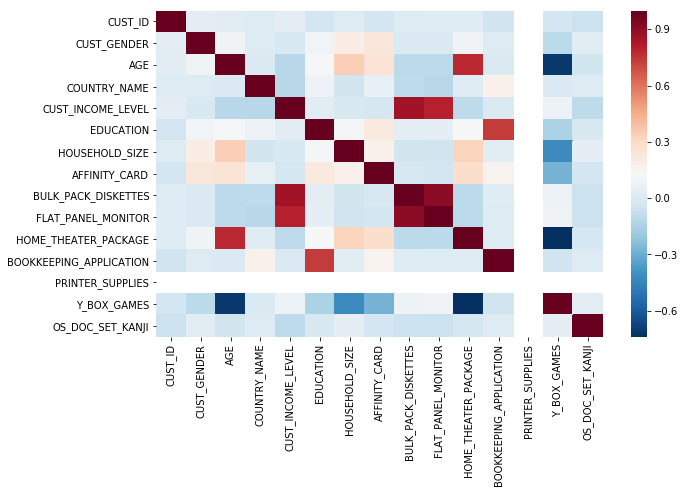

In [45]:
#A coorelation heatmap plot will show a good indication of correlation between the column variables
plt.figure(figsize=(10,6))
mmcorr = mm_df.corr()
sns.heatmap(mmcorr, 
        xticklabels=mmcorr.columns,
        yticklabels=mmcorr.columns, cmap="RdBu_r")

`EUCLIDEAN DISTANCE:` To calculate the Euclidean distance, there are a number of way to calculate this when calculating between rows or datapoints in a pandas dataframe. One way is to import the pdist, squareform packages from the scipy.spatial.distance library

In [46]:
from scipy.spatial.distance import pdist, squareform, cdist

In [47]:
#In this example we will randomly select two different rows from the Marketing dataframe using indexes. 
#limit the variables to include all columns
df = mm_df.loc[[21,1000], 'CUST_ID':'OS_DOC_SET_KANJI']
df

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
21,101522,0,39,18,3,12,Prof,2,1,1,1,1,1,1,0,0
1000,102501,1,48,18,1,10,Exec,3,1,0,0,1,1,1,0,0


In [48]:
#Using the pdist package we can calculate the euclidean distance between the variables of each of the customer
dist = pdist(df[['AGE', 'HOME_THEATER_PACKAGE']], 'euclidean')
df_dist = pd.DataFrame(squareform(dist))

In [49]:
df_dist

,0,1
0,0.0,9.0
1,9.0,0.0


In [50]:
#Another method is to compute the above calling numpy squareroot function on the variables to calculate.
df['EUCL_DIST'] = np.sqrt((df.AGE - df.HOME_THEATER_PACKAGE)**2).sum() ** 0.5
df

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,EUCL_DIST
21,101522,0,39,18,3,12,Prof,2,1,1,1,1,1,1,0,0,9.219544
1000,102501,1,48,18,1,10,Exec,3,1,0,0,1,1,1,0,0,9.219544


# Data Exploration

This part will display the correlation or relationships between the data variables

Distribution plots of some of the categorical variables of Marketing data. 

The program below plots the distribution of any chosen variable from the dataframe and their appropriate skewness with respect to the dataset following the data transformation.

Enter Variable 1 to Plot: age
Enter Label: age
Enter Variable 2 to Plot: cust_income_level
Enter Label: customer income


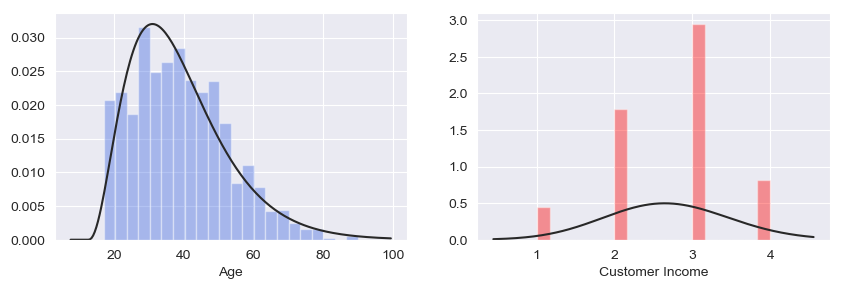

In [51]:
#Provide input for columns and axes labels for Histogram Plots
colname = str.upper(input("Enter Variable 1 to Plot: "))
label1 = str.title(input("Enter Label: "))
colname2 = str.upper(input("Enter Variable 2 to Plot: "))
label2 = str.title(input("Enter Label: "))

#Plot distribution plot of the columns chozen.
sns.set_style(style='darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey=False, dpi=100)
sns.distplot(mm_df[colname], ax= axes[0], kde=False, fit=stats.gamma, color="royalblue", axlabel = label1)
sns.distplot(mm_df[colname2], ax= axes[1], kde=False, fit=stats.gamma, color="r", axlabel = label2)
#sns.distplot(mm_df['EDUCATION'], ax= axes[2], kde=False, fit=stats.gamma,  color="deeppink", axlabel='Education')
#sns.distplot(mm_df['HOUSEHOLD_SIZE'], ax= axes[3], kde=False, fit=stats.gamma,  color="forestgreen", axlabel='Household Size')


The program below allows one to plot a barchart of any two chosen X and Y variables from the dataframe. 

Enter value for X: cust_income_level
Enter value for Y: occupation


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text xticklabel objects>)

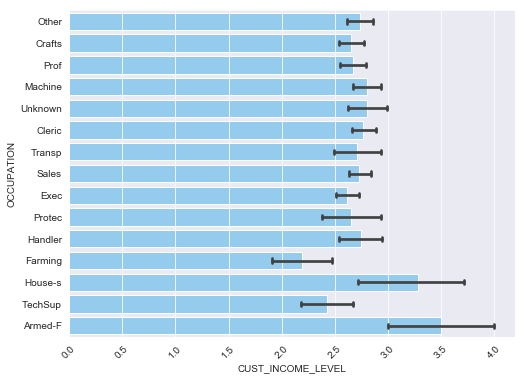

In [52]:
#BARPLOT for X and Y on any two chosen variables from the dataframe.

colx = str.upper(input("Enter value for X: "))
coly = str.upper(input("Enter value for Y: "))
ylabel = str.upper(coly)

plt.figure(figsize=(8,6))
sns.set_style(style='darkgrid')
sns.barplot(x=colx, y=coly, color='lightskyblue', data=mm_df, capsize=.2, zorder=0)
plt.ylabel(ylabel)
plt.xticks(rotation=45)



In [ ]:
#Pairplot to see any relationship of the categorical variables with the target variable.

v1 = str.upper(input("Enter value for variable 1: "))
v2 = str.upper(input("Enter value for variable 2: "))
v3 = str.upper(input("Enter value for variable 3: "))
v4 = str.upper(input("Enter value for variable 4: "))
v5 = str.upper(input("Enter value for variable 5: "))

g = sns.pairplot(mm_df, 
                 vars=[v1, v2, v3, v4, v5], 
                 hue="AFFINITY_CARD", 
                 palette="husl")

In [ ]:
g = sns.jointplot(x='AGE', y='EDUCATION', data=mm_df, kind='reg')